In [1]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(act,

### <span style='color:green'> **[done]** </span>Loading Feature's-ready data

In [2]:
loc = '../data/'
file = 'data_features_outliers_detected.csv'
data = pd.read_csv(loc+file)
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
6314,lose,Alberta Cerra Leon,Remco Pardoel,1994-03-11,Open Weight,SUB,Ezekiel Choke,0.00533,-0.126910,-0.379439,-0.861399,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,-1.724902,-0.02043,-0.001147,-0.018238,False,False
6315,win,Orlando Wiet,Robert Lucarelli,1994-03-11,Open Weight,KO/TKO,Other,0.00533,0.204580,-0.379439,-0.861399,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,1.090338,-0.02043,-0.001147,-0.018238,False,False
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,0.00533,0.241412,0.405662,-0.003396,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,0.198831,-0.02043,-0.001147,-0.018238,False,False


#### <span style='color:green'> **[done]** </span>X & Y definitions:

In [3]:
req_data = ['date','fighter','opponent','weight_class','result','method','outlier','lof_outlier']
y = ['kd_dif','str_dif','td_dif','sub_dif']
X = []

for column in data.columns:
    if ('_dif' in column and column not in y) or 'ratio' in column:
        X.append(column)

data = data[req_data + y + X]
print('X: %s' %X)
print('y: %s' %y)
data.head(3)

X: ['td_avg_dif', 'td_def_dif', 'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif']
y: ['kd_dif', 'str_dif', 'td_dif', 'sub_dif']


,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,2023-04-15,Arnold Allen,Max Holloway,Featherweight,lose,U-DEC,True,True,0.005330,-2.631500,0.013112,-0.003396,0.480496,-0.295218,0.0,-2.441848,-0.607282,-1.221133,0.163857,1.090338,0.647994,5.570234,-1.037795
1,2023-04-15,Billy Quarantillo,Edson Barboza,Featherweight,lose,KO/TKO,False,False,-1.341414,-0.090078,0.013112,-0.003396,0.643021,-0.607068,1.1,2.392919,1.126612,1.055353,-1.573881,0.198831,0.276647,0.555992,-2.057352
2,2023-04-15,Dustin Jacoby,Azamat Murzakanov,Light Heavyweight,lose,U-DEC,False,False,-1.341414,-0.126910,0.013112,-0.003396,-0.186416,-0.814968,0.0,0.510633,-0.854981,0.574761,0.076970,-1.724902,-0.515559,-0.558285,1.001319


#### <span style='color:green'> **[done]** </span>Drop Outliers:

In [4]:
data = data[(data.outlier == False)&(data.lof_outlier == False)].reset_index(drop=True)
data.tail(3)

,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
5210,1994-03-11,Alberta Cerra Leon,Remco Pardoel,Open Weight,lose,SUB,False,False,0.00533,-0.126910,-0.379439,-0.861399,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,-1.724902,-0.02043,-0.001147,-0.018238
5211,1994-03-11,Orlando Wiet,Robert Lucarelli,Open Weight,win,KO/TKO,False,False,0.00533,0.204580,-0.379439,-0.861399,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,1.090338,-0.02043,-0.001147,-0.018238
5212,1994-03-11,Johnny Rhodes,David Levicki,Open Weight,win,KO/TKO,False,False,0.00533,0.241412,0.405662,-0.003396,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,0.198831,-0.02043,-0.001147,-0.018238


#### <span style='color:green'> **[done]** </span>Filter by weight-class: Creating seperate models for each class

In [5]:
weight = "Bantamweight"
weight_classes = {'Flyweight':0,'Bantamweight':1,'Featherweight':2,
                  'Lightweight':3,'Welterweight':4,'Middleweight':5,
                  'Light Heavyweight':6,'Heavyweight':7,'Super Heavyweight':8,'Open Weight':9,
                  "Women's Strawweight":10,"Women's Flyweight":11,"Women's Bantamweight":12,
                  "Women's Featherweight":13}

data = data[data['weight_class']==weight].reset_index(drop=True)
data.tail(3)

,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
418,2011-03-03,Takeya Mizugaki,Reuben Duran,Bantamweight,win,S-DEC,False,False,0.00533,-0.900386,1.583314,-0.003396,0.278741,1.541229,-0.6,0.076260,-1.020113,0.416672,0.598291,0.198831,-0.02043,-0.001147,-0.018238
419,2011-02-05,Miguel Torres,Antonio Banuelos,Bantamweight,win,U-DEC,False,False,0.00533,2.304016,0.013112,-0.003396,-0.898162,-2.408865,1.2,0.775035,0.796346,-0.816425,1.380273,0.198831,-0.02043,-0.001147,-0.018238
420,2010-12-04,Nick Pace,Will Campuzano,Bantamweight,win,SUB,False,False,0.00533,0.057251,2.368415,0.854608,0.928840,0.189881,0.3,-0.635106,0.218382,-0.430687,-0.009917,0.198831,-0.02043,-0.001147,-0.018238


#### <span style='color:green'> **[done]** </span>Train/test/validation assigment:

In [6]:
data = set_train_test(X_columns=X, y_columns=y, data=data, test_size=0.3, valid_size=0.3)
data.tail(3)

Data split: Data=(421, 24), train_set=(200, 11), validation_set=(85, 11), test_set=(136, 11)


,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
418,train,2011-03-03,Takeya Mizugaki,Reuben Duran,Bantamweight,win,S-DEC,False,False,0.00533,-0.900386,1.583314,-0.003396,0.278741,1.541229,-0.6,0.076260,-1.020113,0.416672,0.598291,0.198831,-0.02043,-0.001147,-0.018238
419,validation,2011-02-05,Miguel Torres,Antonio Banuelos,Bantamweight,win,U-DEC,False,False,0.00533,2.304016,0.013112,-0.003396,-0.898162,-2.408865,1.2,0.775035,0.796346,-0.816425,1.380273,0.198831,-0.02043,-0.001147,-0.018238
420,train,2010-12-04,Nick Pace,Will Campuzano,Bantamweight,win,SUB,False,False,0.00533,0.057251,2.368415,0.854608,0.928840,0.189881,0.3,-0.635106,0.218382,-0.430687,-0.009917,0.198831,-0.02043,-0.001147,-0.018238


## <span style='color:green'> **[done]** </span> XGBoost regressor model training:

In [7]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=data)
df.tail(3)

,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
418,train,2011-03-03,Takeya Mizugaki,Reuben Duran,Bantamweight,win,S-DEC,False,False,0.00533,-0.900386,1.583314,-0.003396,0.278741,1.541229,-0.6,0.076260,-1.020113,0.416672,0.598291,0.198831,-0.02043,-0.001147,-0.018238,0.029271,0.029271,0.029271,0.029271
419,validation,2011-02-05,Miguel Torres,Antonio Banuelos,Bantamweight,win,U-DEC,False,False,0.00533,2.304016,0.013112,-0.003396,-0.898162,-2.408865,1.2,0.775035,0.796346,-0.816425,1.380273,0.198831,-0.02043,-0.001147,-0.018238,-0.575038,-0.575038,-0.575038,-0.575038
420,train,2010-12-04,Nick Pace,Will Campuzano,Bantamweight,win,SUB,False,False,0.00533,0.057251,2.368415,0.854608,0.928840,0.189881,0.3,-0.635106,0.218382,-0.430687,-0.009917,0.198831,-0.02043,-0.001147,-0.018238,0.032203,0.032203,0.032203,0.032203


### <span style='color:green'> **[done]** </span>GridSearch (=Parameter tuning):

In [8]:
grid = {'learning_rate': [0.3,0.2,0.1,0.05,0.01],
        'subsample': [0.5,0.6,0.7,0.8,0.9],
        'n_estimators':[50,100,200,300,400],
        'kd_dif_train_error':[None,None,None,None,None],
        'str_dif_train_error':[None,None,None,None,None],
        'td_dif_train_error':[None,None,None,None,None],
        'sub_dif_train_error':[None,None,None,None,None],
        'kd_dif_valid_error':[None,None,None,None,None],
        'str_dif_valid_error':[None,None,None,None,None],
        'td_dif_valid_error':[None,None,None,None,None],
        'sub_dif_valid_error':[None,None,None,None,None],
        'train_error':[None,None,None,None,None],
        'valid_error':[None,None,None,None,None]
        }

grid = pd.DataFrame(data=grid)
grid

,learning_rate,subsample,n_estimators,kd_dif_train_error,str_dif_train_error,td_dif_train_error,sub_dif_train_error,kd_dif_valid_error,str_dif_valid_error,td_dif_valid_error,sub_dif_valid_error,train_error,valid_error
0,0.30,0.5,50,None,None,None,None,None,None,None,None,None,None
1,0.20,0.6,100,None,None,None,None,None,None,None,None,None,None
2,0.10,0.7,200,None,None,None,None,None,None,None,None,None,None
3,0.05,0.8,300,None,None,None,None,None,None,None,None,None,None
4,0.01,0.9,400,None,None,None,None,None,None,None,None,None,None


In [9]:
train_index = df.index[df.set=='train']
valid_index = df.index[df.set=='validation']

i = 0
for learning_rate in tqdm(grid['learning_rate']):
    for subsample in grid['subsample']:
        for n_estimators in grid['n_estimators']:
            
            xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=n_estimators, learning_rate=learning_rate, subsample=subsample, max_depth=5)
            df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
            
            for stat in ['kd_dif','str_dif','td_dif','sub_dif']:
                grid.loc[i,stat + '_train_error'] = get_mean_percentage_error(act=df.loc[train_index,stat],pred=df.loc[train_index, stat + '_pred'])
                grid.loc[i,stat + '_valid_error'] = get_mean_percentage_error(act=df.loc[valid_index,stat],pred=df.loc[valid_index,stat + '_pred'])
                
    i += 1  
    
grid['train_error'] = 0.25*(grid['kd_dif_train_error'] + grid['str_dif_train_error'] + grid['td_dif_train_error'] + grid['sub_dif_train_error'])
grid['valid_error'] = 0.25*(grid['kd_dif_valid_error'] + grid['str_dif_valid_error'] + grid['td_dif_valid_error'] + grid['sub_dif_valid_error'])
grid = grid[['learning_rate','subsample','n_estimators','train_error','valid_error']]
grid

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:32<00:00, 18.43s/it]


,learning_rate,subsample,n_estimators,train_error,valid_error
0,0.30,0.5,50,0.852365,0.846491
1,0.20,0.6,100,0.852364,0.834086
2,0.10,0.7,200,0.852373,0.842457
3,0.05,0.8,300,0.852692,0.845436
4,0.01,0.9,400,0.869677,0.854439


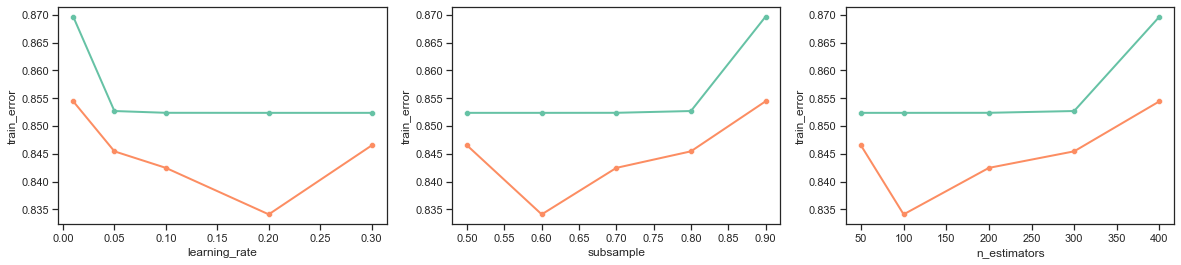

In [10]:
rows=1
cols=3
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (20,4))
model_param = ['learning_rate','subsample','n_estimators']

for i in range(len(model_param)):
    sns.lineplot(ax=axs[i], data=grid, x=model_param[i], y='train_error')
    sns.scatterplot(ax=axs[i], data=grid, x=model_param[i], y='train_error')
    sns.lineplot(ax=axs[i], data=grid, x=model_param[i], y='valid_error')
    sns.scatterplot(ax=axs[i], data=grid, x=model_param[i], y='valid_error')

#### <span style='color:green'> **[done]** </span> Train model with chosen parameters:

In [11]:
grid[grid.valid_error == np.min(grid.valid_error)]

,learning_rate,subsample,n_estimators,train_error,valid_error
1,0.2,0.6,100,0.852364,0.834086


In [12]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=grid.loc[0,'n_estimators'], learning_rate=grid.loc[0,'learning_rate'], subsample=grid.loc[0,'subsample'], max_depth=len(X))
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
418,train,2011-03-03,Takeya Mizugaki,Reuben Duran,Bantamweight,win,S-DEC,False,False,0.00533,-0.900386,1.583314,-0.003396,0.278741,1.541229,-0.6,0.076260,-1.020113,0.416672,0.598291,0.198831,-0.02043,-0.001147,-0.018238,-0.020032,-0.020032,-0.020032,-0.020032
419,validation,2011-02-05,Miguel Torres,Antonio Banuelos,Bantamweight,win,U-DEC,False,False,0.00533,2.304016,0.013112,-0.003396,-0.898162,-2.408865,1.2,0.775035,0.796346,-0.816425,1.380273,0.198831,-0.02043,-0.001147,-0.018238,-0.859831,-0.859831,-0.859831,-0.859831
420,train,2010-12-04,Nick Pace,Will Campuzano,Bantamweight,win,SUB,False,False,0.00533,0.057251,2.368415,0.854608,0.928840,0.189881,0.3,-0.635106,0.218382,-0.430687,-0.009917,0.198831,-0.02043,-0.001147,-0.018238,0.016120,0.016120,0.016120,0.016120


#### <span style='color:green'> **[done]** </span> Add predictions to data:

In [13]:
#test
pred_columns = ['kd_dif_pred','str_dif_pred','td_dif_pred','sub_dif_pred']
pred = df[['date','fighter','opponent'] + pred_columns]
pred.head(3)

,date,fighter,opponent,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
0,2023-04-15,Gaston Bolanos,Aaron Phillips,0.002851,0.002851,0.002851,0.002851
1,2023-04-08,Adrian Yanez,Rob Font,0.910079,0.910079,0.910079,0.910079
2,2023-04-08,Christian Rodriguez,Raul Rosas Jr.,2.801502,2.801502,2.801502,2.801502


In [14]:
data = pd.read_csv('../data/data_features_outliers_detected.csv')
data = pd.merge(data,pred, on=['date','fighter','opponent'], how='outer')

data.to_csv('../data/data_stats_prediction_set.csv', index=None)
print('../data/data_stats_prediction_set.csv saved.')
data.tail(3)

../data/data_stats_prediction_set.csv saved.


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6314,lose,Alberta Cerra Leon,Remco Pardoel,1994-03-11,Open Weight,SUB,Ezekiel Choke,0.00533,-0.126910,-0.379439,-0.861399,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,-1.724902,-0.02043,-0.001147,-0.018238,False,False,NaN,NaN,NaN,NaN
6315,win,Orlando Wiet,Robert Lucarelli,1994-03-11,Open Weight,KO/TKO,Other,0.00533,0.204580,-0.379439,-0.861399,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,1.090338,-0.02043,-0.001147,-0.018238,False,False,NaN,NaN,NaN,NaN
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,0.00533,0.241412,0.405662,-0.003396,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,0.198831,-0.02043,-0.001147,-0.018238,False,False,NaN,NaN,NaN,NaN


#### <span style='color:green'> **[done]** </span> Saving model as pickle:

In [15]:
save_trained_model(model=xgboost_reg,filename_path='../global_variables/stats_pred_' + set_lower_cases(weight) + '_xgboost_reg.pkl')

../global_variables/stats_pred_bantamweight_xgboost_reg.pkl saved.
